<a href="https://colab.research.google.com/github/chaikrk/Logistic_Regression_Breast_Cancer/blob/main/logistic_reggression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("yasserh/breast-cancer-dataset")

print("Path to dataset files:", path)


df = pd.read_csv(os.path.join(path , 'breast-cancer.csv'))




Path to dataset files: /kaggle/input/breast-cancer-dataset


In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df = df.drop(columns = ['id'] , errors='ignore')
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})

X = df.drop(columns=['diagnosis'])
Y = df['diagnosis'] # Y now is a pandas series not a df

In [ ]:
# IMMEDIATELY AFTER MAPPING, check again:
print("\n--- After Mapping ---")
print("Unique values in 'diagnosis' column AFTER mapping:")
print(Y.unique())

print("\nFirst 5 rows of DataFrame AFTER mapping:")
print(Y.head())

print("\nNumber of missing values (NaN) in 'diagnosis' column AFTER mapping:")
print(Y.isnull().sum())


--- After Mapping ---
Unique values in 'diagnosis' column AFTER mapping:
[1 0]

First 5 rows of DataFrame AFTER mapping:
0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

Number of missing values (NaN) in 'diagnosis' column AFTER mapping:
0


In [ ]:
X.head()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
Y.head()

,diagnosis
0,1
1,1
2,1
3,1
4,1


In [ ]:
# Step 1: Splitting the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("--- After Train-Test Split ---")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


--- After Train-Test Split ---
X_train shape: (455, 30)
X_test shape: (114, 30)
y_train shape: (455,)
y_test shape: (114,)


In [ ]:
# Step 2: Applying Scaling (I had to becuase the results were bad)

from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler ONLY on the training data (X_train)
# This learns the mean and standard deviation for each feature from the training set.
X_train_scaled = scaler.fit_transform(X_train)

# Transform both the training and testing data using the SAME fitted scaler
# This applies the scaling learned from the training data to both sets.
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames for easier viewing (optional, but good practice)
# Make sure to preserve column names!
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)


print("\n--- After Scaling ---")
print(f"X_train_scaled shape: {X_train_scaled_df.shape}")
print(f"X_test_scaled shape: {X_test_scaled_df.shape}")
print(f"First 5 rows of X_train_scaled:\n{X_train_scaled_df.head()}")
print(f"\nFirst 5 rows of X_test_scaled:\n{X_test_scaled_df.head()}")


--- After Scaling ---
X_train_scaled shape: (455, 30)
X_test_scaled shape: (114, 30)
First 5 rows of X_train_scaled:
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0    -1.440753     -0.435319       -1.362085  -1.139118         0.780573   
1     1.974096      1.733026        2.091672   1.851973         1.319843   
2    -1.399982     -1.249622       -1.345209  -1.109785        -1.332645   
3    -0.981797      1.416222       -0.982587  -0.866944         0.059390   
4    -1.117700     -1.010259       -1.125002  -0.965942         1.269511   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          0.718921        2.823135            -0.119150       1.092662   
1          3.426275        2.013112             2.665032       2.127004   
2         -0.307355       -0.365558            -0.696502       1.930333   
3         -0.596788       -0.820203            -0.845115       0.313264   
4         -0.439002       -0.983341            -0.

In [ ]:

# Step 3: Model Training (Logistic Regression)

from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
# 'max_iter' sets the maximum number of iterations for the optimization algorithm to converge.
model = LogisticRegression(random_state=42, solver='liblinear', max_iter=100)

# Train the model using the scaled training data and the training labels
print("Training the Logistic Regression model...")
model.fit(X_train_scaled_df, y_train) # Make sure to use the scaled DataFrames!
print("Model training complete!")



Training the Logistic Regression model...
Model training complete!


Making predictions on the test set...
Predictions made.

Accuracy Score: 0.9737

Confusion Matrix:
[[70  1]
 [ 2 41]]


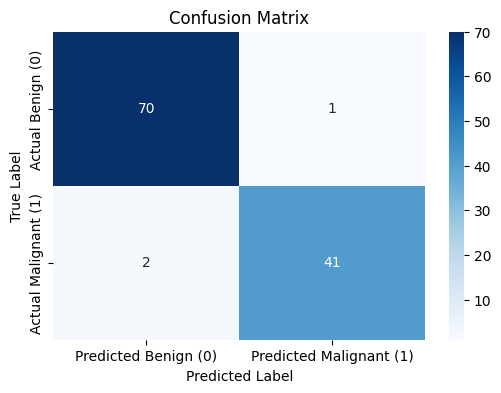


Classification Report:
               precision    recall  f1-score   support

   Benign (0)       0.97      0.99      0.98        71
Malignant (1)       0.98      0.95      0.96        43

     accuracy                           0.97       114
    macro avg       0.97      0.97      0.97       114
 weighted avg       0.97      0.97      0.97       114



In [ ]:

# Step 4: Model Prediction and Evaluation

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions on the scaled test data
print("Making predictions on the test set...")
y_pred = model.predict(X_test_scaled_df)
print("Predictions made.")

# --- Evaluation Metrics ---

# 1. Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy Score: {accuracy:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# For better visualization of the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Benign (0)', 'Predicted Malignant (1)'],
            yticklabels=['Actual Benign (0)', 'Actual Malignant (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_test, y_pred, target_names=['Benign (0)', 'Malignant (1)'])
print("\nClassification Report:")
print(class_report)